# 6b Generated Signal Exploration

Events were generated for the process X->YH->HHH->6b using MadGraph and Pythia. This notebook explores the generated signal behaviors and signatures.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
from consistent_plots import hist, hist2d
from utils.analysis import Tree
import utils.plotter as pltt

In [3]:
base = "root://cmseos.fnal.gov//store/user/lpchbb/srosenzw/XYH_YToHH/CRAB_PrivateMC/srosenzw_NMSSM_XYH_YToHH_6b_MX_700_MY_400_sl7_nano_10M/210720_172657/"
filename = base + 'ntuple_0.root'
tree = Tree(filename, treename='Events', as_ak=True)

In [4]:
import awkward as ak

In [5]:
tree.nGenJet

<Array [10, 12, 7, 9, 10, ... 8, 11, 8, 10, 8] type='973004 * uint32'>

In [12]:
nGenJet = tree.nGenJet.to_numpy()

In [16]:
fig, ax = plt.subplots(figsize=(7,4))
# bins = np.arange(.max())
# n, b = np.histogram(tree.nGenJet.to_numpy(), bins=bins)
pltt.hist(x=nGenJet, bins=np.arange(22), xlim=(0,20), xlabel='Number of Gen Jets in Event', ylabel='AU', density=True, ax=ax, fig=fig, savefig='gen_jet_multiplicity', title='Gen Jet Multiplicity', pdf=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
def plotEff(ax, data, mask, bins, label):
    
    x = (bins[1:] + bins[:-1])/2
    n_denom, bins = np.histogram(data, bins)
    n_num, bins = np.histogram(data[mask], bins)
    
    eff = np.where(n_denom != 0, n_num / n_denom, 0)
    eff = np.where(n_denom == n_num, 1, eff)
    eff = np.where(n_num == 0, 0, eff)
    
    return makePlot(ax, x, weights=eff, bins=bins, label=label)

def p4(pt, eta, phi, m):
    return TLorentzVectorArray.from_ptetaphim(pt, eta, phi, m)

In [3]:
# Open filename, create a tree, branches, and tables.
filename = '../mlsixb/inputs/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_reco_preselections.root'

t = get_uproot_Table(filename)

----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_ptRegressed         
HX_b1_recojet_eta                 HX_b1_recojet_phi                 HX_b2_recojet_m                   
HX_b2_recojet_pt                  HX_b2_recojet_ptRegressed         HX_b2_recojet_eta                 
HX_b2_recojet_phi                 HY1_b1_recojet_m                  HY1_b1_recojet_pt                 
HY1_b1_recojet_ptRegressed        HY1_b1_recojet_eta                HY1_b1_recojet_phi                
HY1_b2_recojet_m                  HY1_b2_recojet_pt                 HY1_b2_recojet_ptRegressed        
HY1_b2_recojet_eta                HY1_b2_recojet_phi                HY2_b1_reco

Generated b quarks and jets are all saved 

In [4]:
HX_b1  = {'pt': t[f'HX_b1_recojet_pt' ],
          'eta':t[f'HX_b1_recojet_eta'],
          'phi':t[f'HX_b1_recojet_phi'],
          'm':  t[f'HX_b1_recojet_m'  ]}
HX_b2  = {'pt': t[f'HX_b2_recojet_pt' ],
          'eta':t[f'HX_b2_recojet_eta'],
          'phi':t[f'HX_b2_recojet_phi'],
          'm':  t[f'HX_b2_recojet_m'  ]}
HY1_b1 = {'pt': t[f'HY1_b1_recojet_pt'],
          'eta':t[f'HY1_b1_recojet_eta'],
          'phi':t[f'HY1_b1_recojet_phi'],
          'm':  t[f'HY1_b1_recojet_m' ]}
HY1_b2 = {'pt': t[f'HY1_b2_recojet_pt'],
          'eta':t[f'HY1_b2_recojet_eta'],
          'phi':t[f'HY1_b2_recojet_phi'],
          'm':  t[f'HY1_b2_recojet_m' ]}
HY2_b1 = {'pt': t[f'HY2_b1_recojet_pt'],
          'eta':t[f'HY2_b1_recojet_eta'],
          'phi':t[f'HY2_b1_recojet_phi'],
          'm':  t[f'HY2_b1_recojet_m' ]}
HY2_b2 = {'pt': t[f'HY2_b2_recojet_pt'],
          'eta':t[f'HY2_b2_recojet_eta'],
          'phi':t[f'HY2_b2_recojet_phi'],
          'm':  t[f'HY2_b2_recojet_m' ]}

part_dict = {0:HX_b1, 1:HX_b2, 2:HY1_b1, 3:HY1_b2, 4:HY2_b1, 5:HY2_b2}
part_name = {0:'HX_b1', 1:'HX_b2', 2:'HY1_b1', 3:'HY1_b2', 4:'HY2_b1', 5:'HY2_b2'}

In [29]:
ptbins = np.linspace(0,400,100)
etabins = np.linspace(-3,3,100)
phibins = np.linspace(-np.pi, np.pi, 100)
mbins = np.linspace(75, 175, 100)

bins = [ptbins, etabins, phibins, mbins]
ax_labels = [r'$p_T$ [GeV]', r'$\eta$', r'$\phi$ [rad]', r'$m$ [GeV]']

In [30]:
HX = p4(HX_b1['pt'], HX_b1['eta'], HX_b1['phi'], HX_b1['m']) + p4(HX_b2['pt'], HX_b2['eta'], HX_b2['phi'], HX_b2['m'])
H1 = p4(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], HY1_b1['m']) + p4(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], HY1_b2['m'])
H2 = p4(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], HY2_b1['m']) + p4(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], HY2_b2['m'])

h_pt = [HX.pt, H1.pt, H2.pt]
h_eta = [HX.eta, H1.eta, H2.eta]
h_phi = [HX.phi, H1.phi, H2.phi]
h_m = [HX.mass, H1.mass, H2.mass]

Y = H1 + H2
Y_k = [Y.pt, Y.eta, Y.phi, Y.mass]

h = [h_pt, h_eta, h_phi, h_m]
part_name = {0:'HX', 1:'H2', 2:'H1'}

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for n,ax in enumerate(axs):
    data = h[n]
    for i in range(3):
        hist(ax, data[i], bins=bins[n], label=part_name[i])
    ax.legend()
    ax.set_xlabel(ax_labels[n])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
bins[3] = np.linspace(300, 500, 100)

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for n,ax in enumerate(axs):
    data = Y_k[n]
    hist(ax, data, bins=bins[n])
    ax.set_xlabel(ax_labels[n])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
dR_YH = calcDeltaR(HX.eta, Y.eta, HX.phi, Y.phi)

In [37]:
fig, ax =  plt.subplots()
hist(ax, dR_YH)
ax.set_xlabel(r'$\Delta R$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$\\Delta R$')

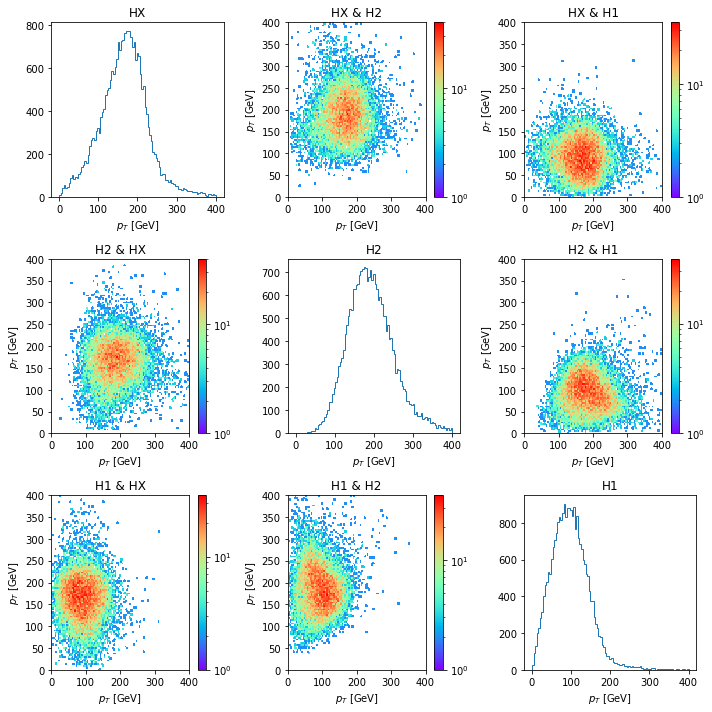

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        ax = axs[i][j]
        ax.set_xlabel(ax_labels[0])
        if i == j: 
            ax.set_title(part_name[i])
            hist(ax, h_pt[i], bins=ptbins)
        else:
            n, bx, by, im = hist2d(ax, h_pt[i], h_pt[j], xbins=ptbins, ybins=ptbins)
            ax.set_ylabel(ax_labels[0])
            ax.set_title(f'{part_name[i]} & {part_name[j]}')
            fig.colorbar(im, ax=ax)

plt.tight_layout()

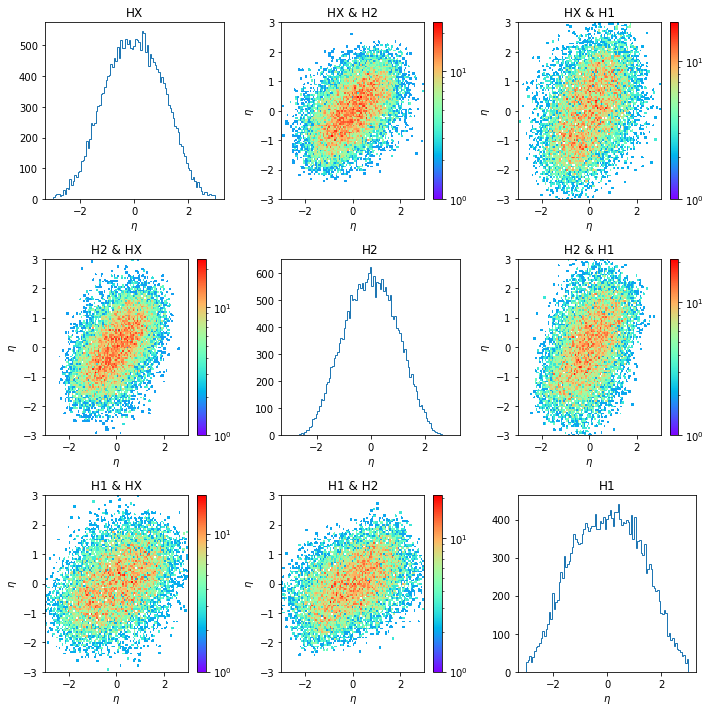

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        ax = axs[i][j]
        ax.set_xlabel(ax_labels[1])
        if i == j: 
            ax.set_title(part_name[i])
            hist(ax, h_eta[i], bins=etabins)
        else:
            n, bx, by, im = hist2d(ax, h_eta[i], h_eta[j], xbins=etabins, ybins=etabins)
            ax.set_ylabel(ax_labels[1])
            ax.set_title(f'{part_name[i]} & {part_name[j]}')
            fig.colorbar(im, ax=ax)

plt.tight_layout()

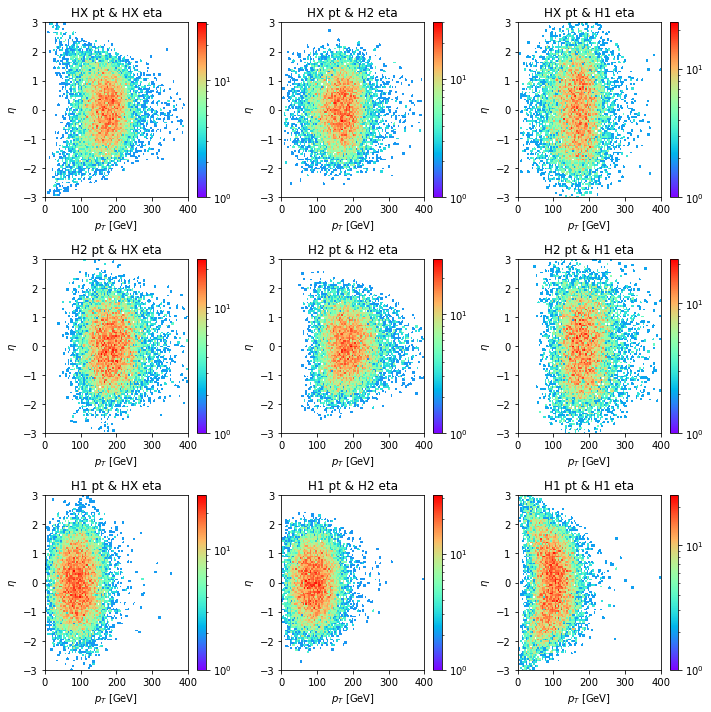

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        ax = axs[i][j]
        ax.set_xlabel(ax_labels[0])
        n, bx, by, im = hist2d(ax, h_pt[i], h_eta[j], xbins=ptbins, ybins=etabins)
        ax.set_ylabel(ax_labels[1])
        ax.set_title(f'{part_name[i]} pt & {part_name[j]} eta')
        fig.colorbar(im, ax=ax)

plt.tight_layout()

In [36]:
HX111 = p4(HX_b1['pt'], HX_b1['eta'], HX_b1['phi'], HX_b1['m']) + p4(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], HY1_b2['m'])
HX112 = p4(HX_b1['pt'], HX_b1['eta'], HX_b1['phi'], HX_b1['m']) + p4(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], HY1_b2['m'])
HX121 = p4(HX_b1['pt'], HX_b1['eta'], HX_b1['phi'], HX_b1['m']) + p4(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], HY2_b2['m'])
HX122 = p4(HX_b1['pt'], HX_b1['eta'], HX_b1['phi'], HX_b1['m']) + p4(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], HY2_b2['m'])
HX211 = p4(HX_b2['pt'], HX_b2['eta'], HX_b2['phi'], HX_b2['m']) + p4(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], HY1_b2['m'])
HX212 = p4(HX_b2['pt'], HX_b2['eta'], HX_b2['phi'], HX_b2['m']) + p4(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], HY1_b2['m'])
HX221 = p4(HX_b2['pt'], HX_b2['eta'], HX_b2['phi'], HX_b2['m']) + p4(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], HY2_b2['m'])
HX222 = p4(HX_b2['pt'], HX_b2['eta'], HX_b2['phi'], HX_b2['m']) + p4(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], HY2_b2['m'])
H1121 = p4(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], HY1_b1['m']) + p4(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], HY2_b1['m'])
H1122 = p4(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], HY1_b1['m']) + p4(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], HY2_b2['m'])
H1221 = p4(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], HY1_b2['m']) + p4(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], HY2_b1['m'])
H1222 = p4(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], HY1_b2['m']) + p4(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], HY2_b2['m'])

nonHiggs = [HX111, HX112, HX121, HX122, HX211, HX212, HX221, HX222, H1121, H1122, H1221, H1222]
nonHiggs_labels = ['HX111', 'HX112', 'HX121', 'HX122', 'HX211', 'HX212', 'HX221', 'HX222', 'H1121', 'H1122', 'H1221', 'H1222']

In [29]:
nonHiggs[0].pt

array([ 83.6321  ,  91.119484,  22.446886, ..., 247.51482 , 125.29723 ,
       102.84621 ], dtype=float32)

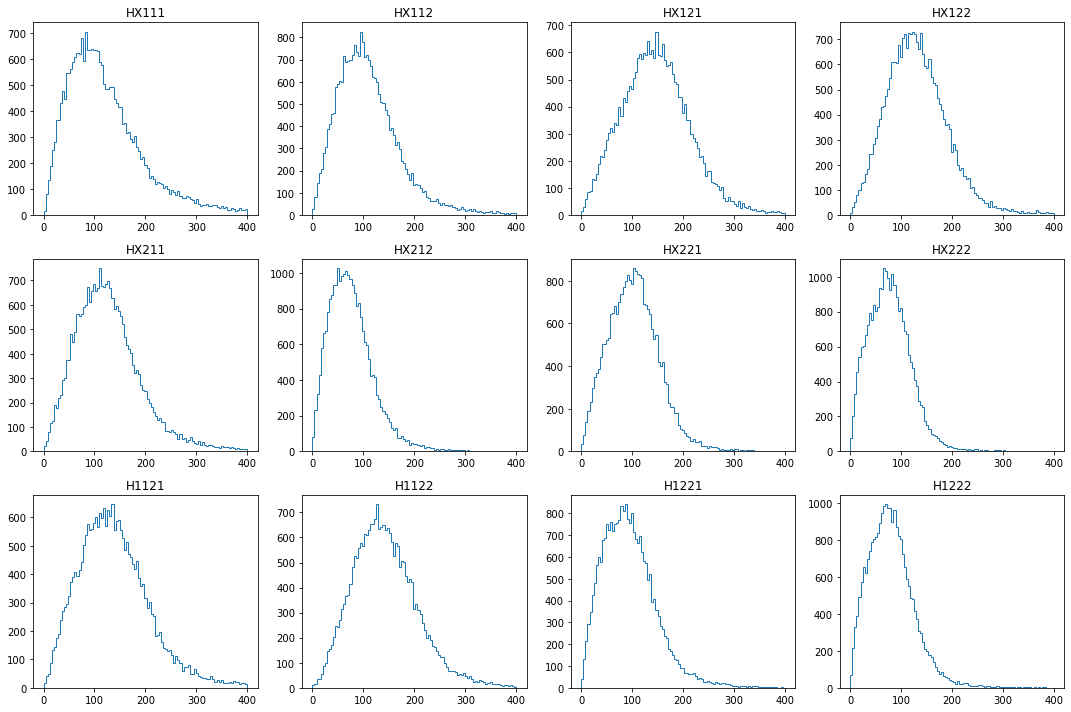

In [42]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
for n,ax in enumerate(axs.flat):
    hist(ax, nonHiggs[n].pt, bins=ptbins)
    ax.set_title(nonHiggs_labels[n])
    ax.set_label(ax_labels[0])
    
plt.tight_layout()

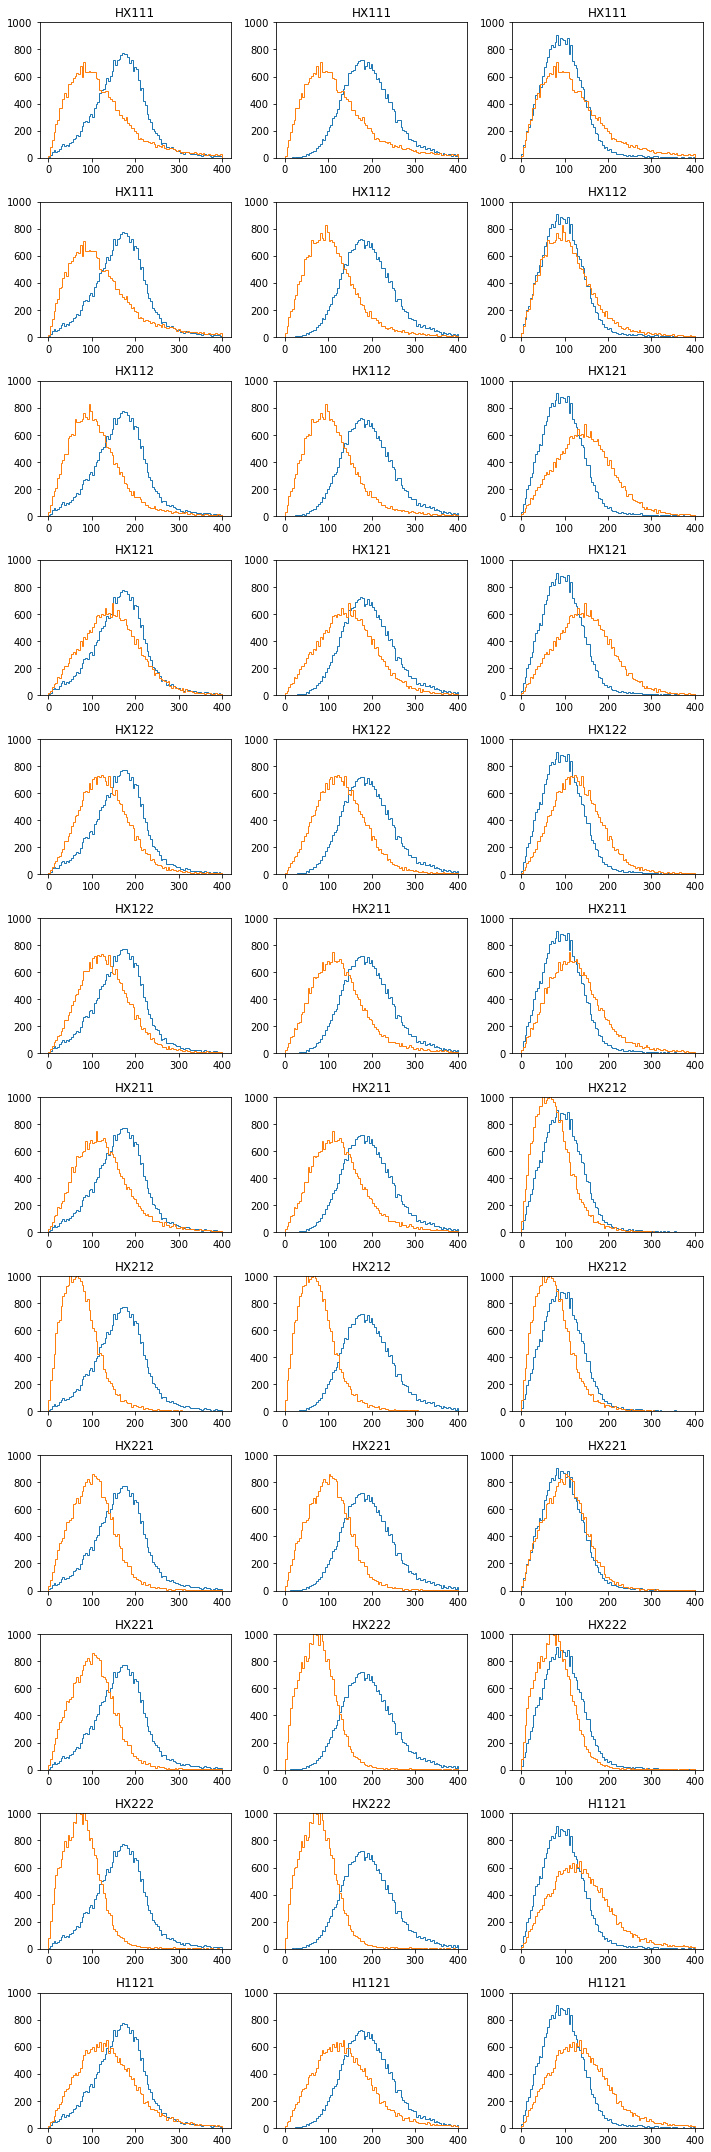

In [49]:
fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(10,30))
for n,ax in enumerate(axs.flat):
    nonH_data = nonHiggs[n//4].pt
    H_data = h_pt[n%3]
    hist(ax, H_data, bins=ptbins)
    hist(ax, nonH_data, bins=ptbins)
    ax.set_title(nonHiggs_labels[n//4])
    ax.set_label(ax_labels[0])
    ax.set_ylim(0,1000)
    
plt.tight_layout()

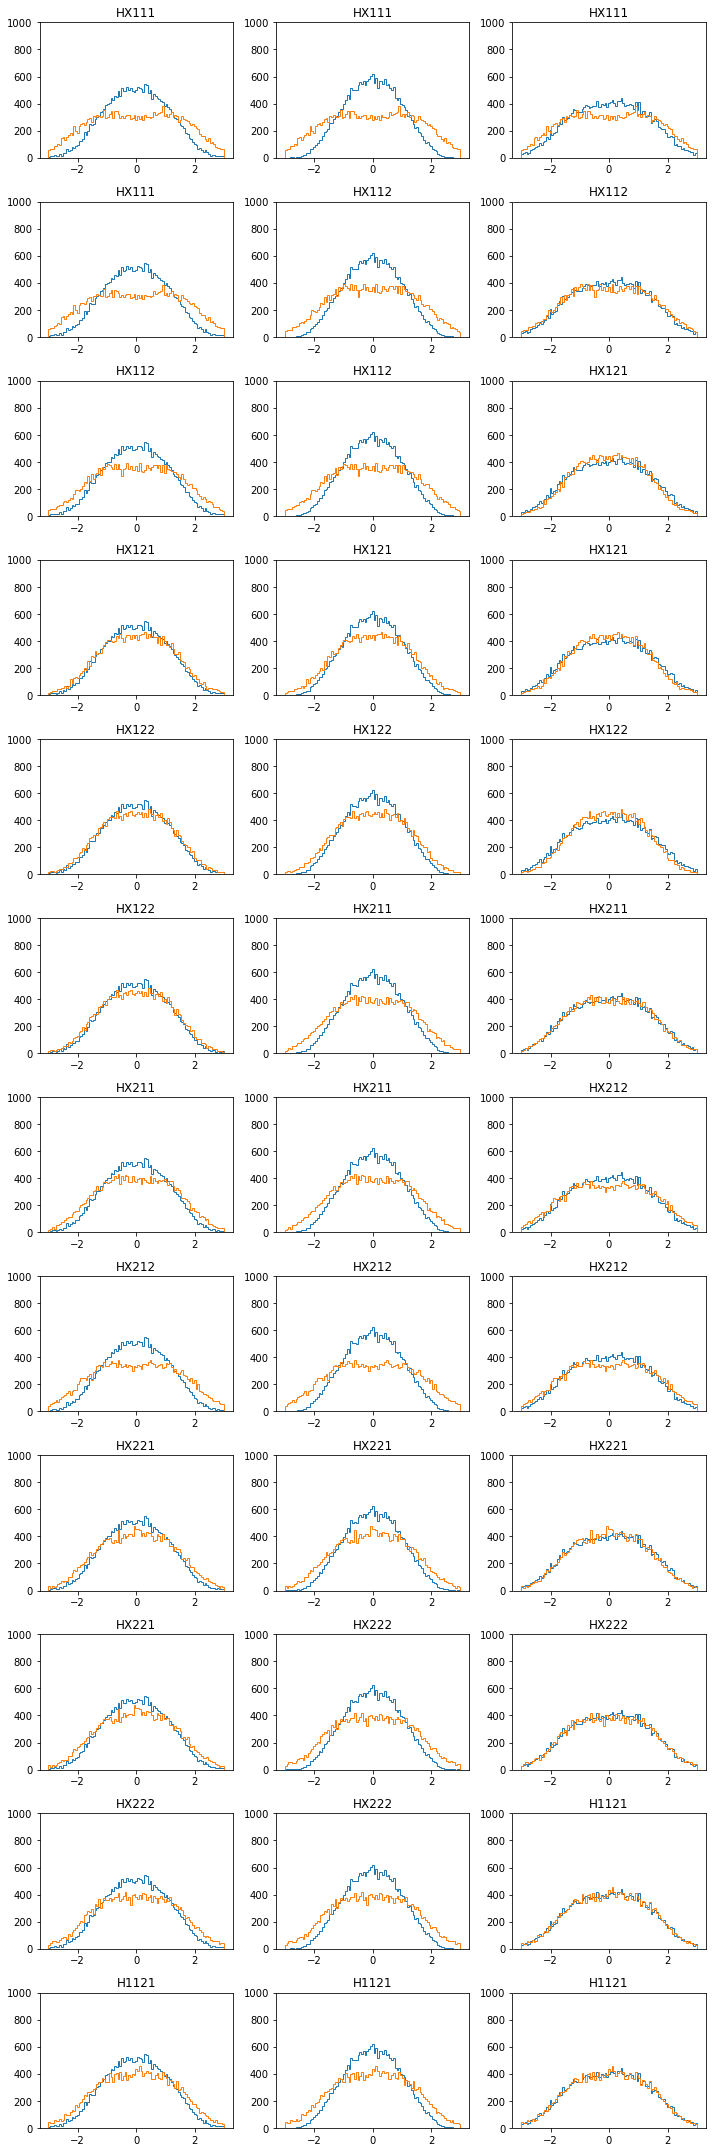

In [50]:
fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(10,30))
for n,ax in enumerate(axs.flat):
    nonH_data = nonHiggs[n//4].eta
    H_data = h_eta[n%3]
    hist(ax, H_data, bins=etabins)
    hist(ax, nonH_data, bins=etabins)
    ax.set_title(nonHiggs_labels[n//4])
    ax.set_label(ax_labels[0])
    ax.set_ylim(0,1000)
    
plt.tight_layout()